In [1]:
# 参考
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import norm

In [2]:
NUM_TRIALS = 10000
BANDIT_MEANS = [3.3, 5.5, 4, 4.5, 2.3, 6, 4]

In [3]:
class Bandit:
    def __init__(self, true_mean):
        
        self.true_mean = true_mean
        self.predicted_mean = 0
        self.lambda_ = 1
        self.tau = 1
        
        self.mean_0 = 0
        self.lambda_0 = 1
        self.N = 0
    
    def pull(self):
        return np.random.normal(self.true_mean, 1/np.sqrt(self.tau))
    
    def sample(self):
        return np.random.normal(self.predicted_mean, 1/np.sqrt(self.lambda_))
    
    def update(self, x):
        self.predicted_mean = (self.tau * x + self.lambda_ * self.predicted_mean + self.mean_0 * self.lambda_0) / (self.tau + self.lambda_)
        self.lambda_ += self.tau + self.lambda_0
        self.N += 1
        
def plot(bandits, trial):
    x = np.linspace(-10, 10, 500)
    for b in bandits:
        y = norm.pdf(x, b.predicted_mean, np.sqrt(1. / b.lambda_))
        plt.plot(x, y, label=f"real mean: {b.true_mean:.4f}, num plays: {b.N}")
    plt.title(f"Bandit distributions after {trial} trials")
    plt.legend()
    plt.show()
    
def experiment():
    bandits = [Bandit(m) for m in BANDIT_MEANS]
  
    sample_points = [5,10,20,50,100,200,500,1000,1500,2000, 3000, 4000, 6000,
                    8000, 9999]
    rewards = np.zeros(NUM_TRIALS)
    for i in range(NUM_TRIALS):
      # Thompson sampling
      j = np.argmax([b.sample() for b in bandits])
  
      # plot the posteriors
      if i in sample_points:
        plot(bandits, i)
  
      # pull the arm for the bandit with the largest sample
      x = bandits[j].pull()
  
      # update rewards
      rewards[i] = x
  
      # update the distribution for the bandit whose arm we just pulled
      bandits[j].update(x)
  
    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    for m in BANDIT_MEANS:
        plt.plot(np.ones(NUM_TRIALS)*m)
    plt.show()



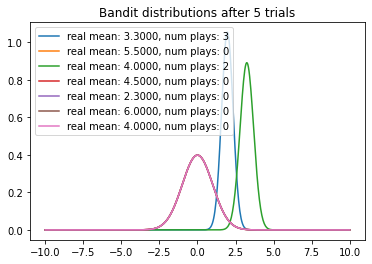

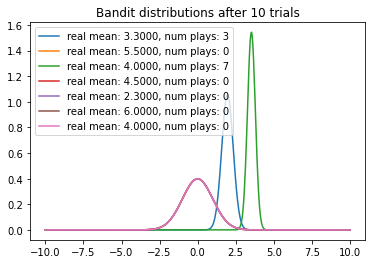

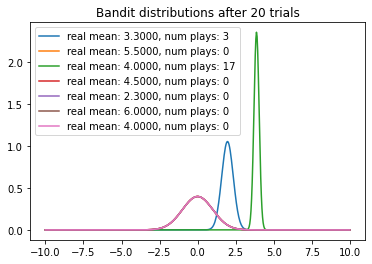

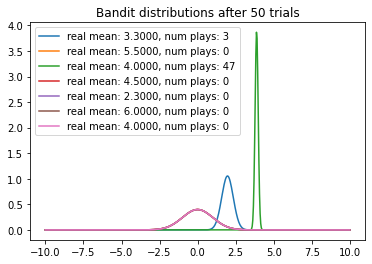

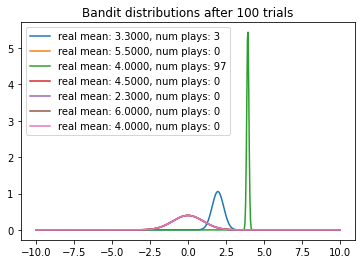

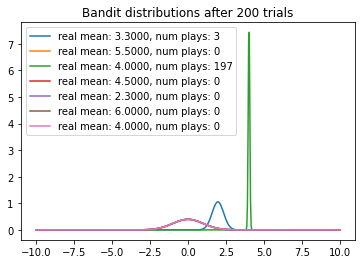

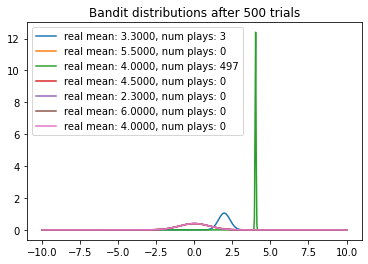

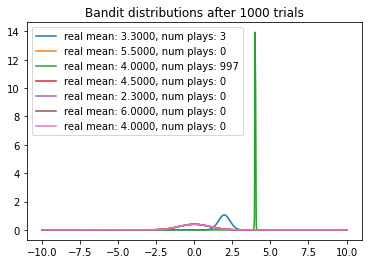

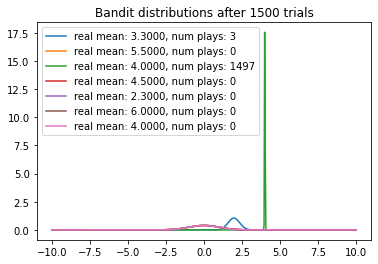

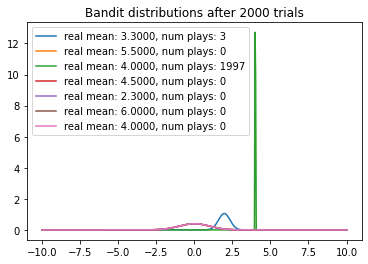

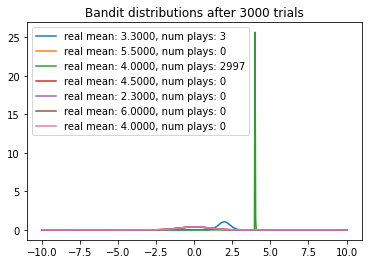

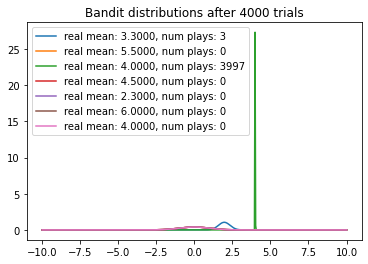

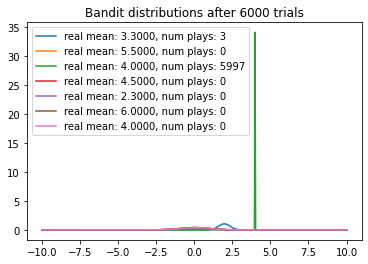

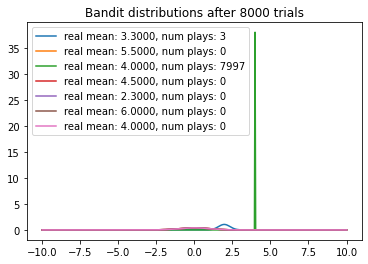

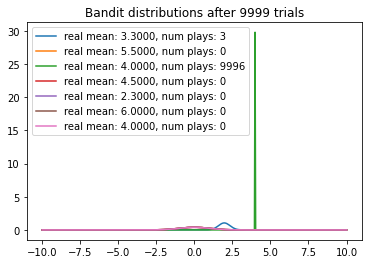

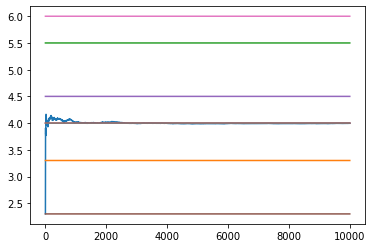

In [4]:
experiment()